In [101]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp
import matplotlib.pyplot as plt

In [102]:
# Date range
start = '2019-01-01'
end = '2023-12-30'

In [103]:
tickers = ['AMD','AMZN','AAPL','GOOG','META','MSFT', 'NFLX','NVDA','TSLA']

In [104]:
# Sort in ascending Order
tickers.sort

<function list.sort(*, key=None, reverse=False)>

In [105]:
# Downloading the data
data = yf.download(tickers, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers
assets = data.pct_change().dropna()

[*********************100%***********************]  9 of 9 completed


In [106]:
Y = assets

In [107]:
# Creating the Portfolio Object
port = rp.Portfolio(returns=Y)

In [108]:
# To display dataframes values in percentage format
pd.options.display.float_format = '{:.4%}'.format

In [109]:
# Choose the risk measure, ’GMD’: Gini Mean Difference, ’CVaR’: Conditional Value at Risk....
rm = 'MSV'  # Semi Standard Deviation

In [110]:
# Estimate inputs of the model (historical estimates)
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

In [111]:
# Calculate the inputs that will be used by the optimization method when we select the input model=’Classic’
port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

In [112]:
# Estimate the portfolio that maximizes the risk adjusted return ratio
w1 = port.optimization(model='Classic', rm=rm, obj='Sharpe', rf=0.0, l=0, hist=True)

In [113]:
print(w1)

      weights
AMD  25.3130%
AMZN  0.0000%
AAPL  0.0000%
GOOG  0.0000%
META  0.0000%
MSFT  0.0000%
NFLX  0.0000%
NVDA 52.7631%
TSLA 21.9240%


In [114]:

# Estimate points in the efficient frontier mean - semi standard deviation
ws = port.efficient_frontier(model='Classic', rm=rm, points=20, rf=0, hist=True)

In [115]:
# Estimate the risk parity portfolio for semi standard deviation
w2 = port.rp_optimization(model='Classic', rm=rm, rf=0, b=None, hist=True)

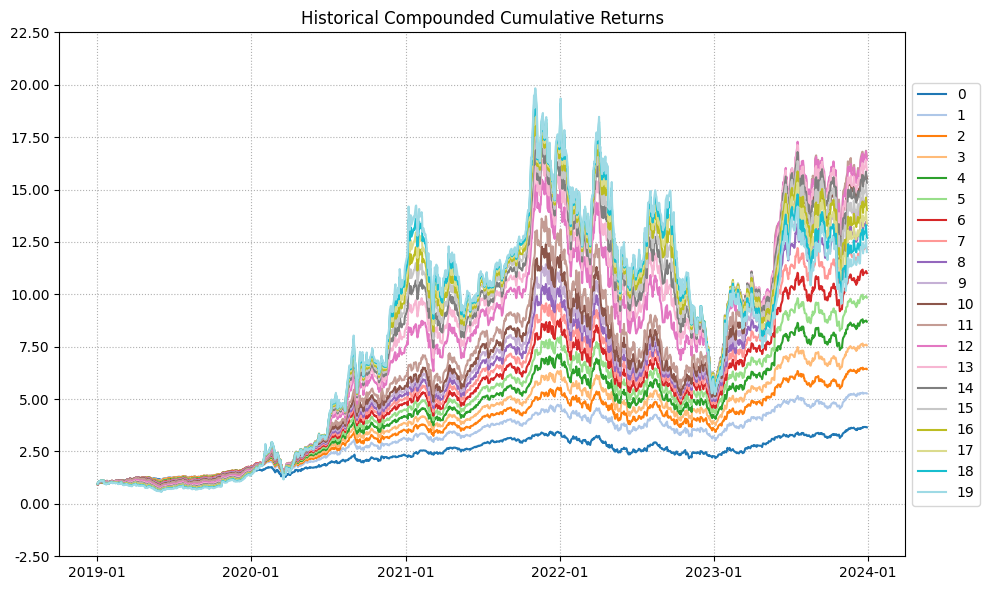

In [116]:
ax = rp.plot_series(returns=Y,
                    w=ws,
                    cmap='tab20',
                    height=6,
                    width=10,
                    ax=None)

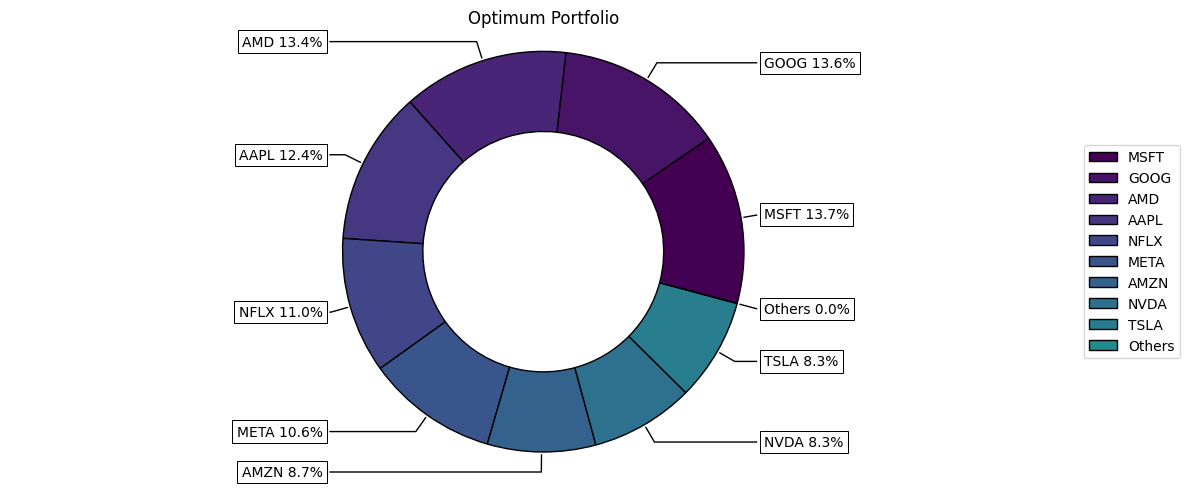

In [117]:
# The risk parity portfolio aims to balance the impact of each asset's risk on the overall portfolio.
# W2 Estimate the risk parity portfolio for semi standard deviation

ax=rp.plot_pie(w=w2, title="Optimum Portfolio", cmap='viridis', height=5, width=12, ax=None)
plt.show()

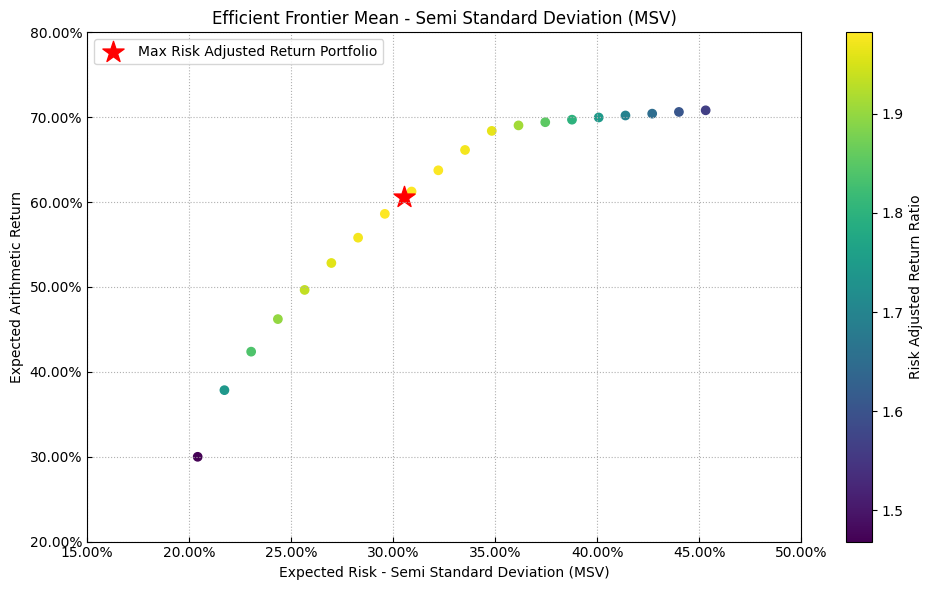

In [118]:
# The Tangency Portfolio is often highlighted because it represents the optimal portfolio in terms of the Sharpe ratio, which balances expected return and risk (standard deviation)
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix representing the risk relationships between assets.
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=ws,
                      mu=mu,
                      cov=cov,
                      returns=returns,
                      rm='MSV',
                      rf=0,
                      alpha=0.05,
                      cmap='viridis',
                      w=w1,
                      label=label,
                      marker='*',
                      s=16,
                      c='r',
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

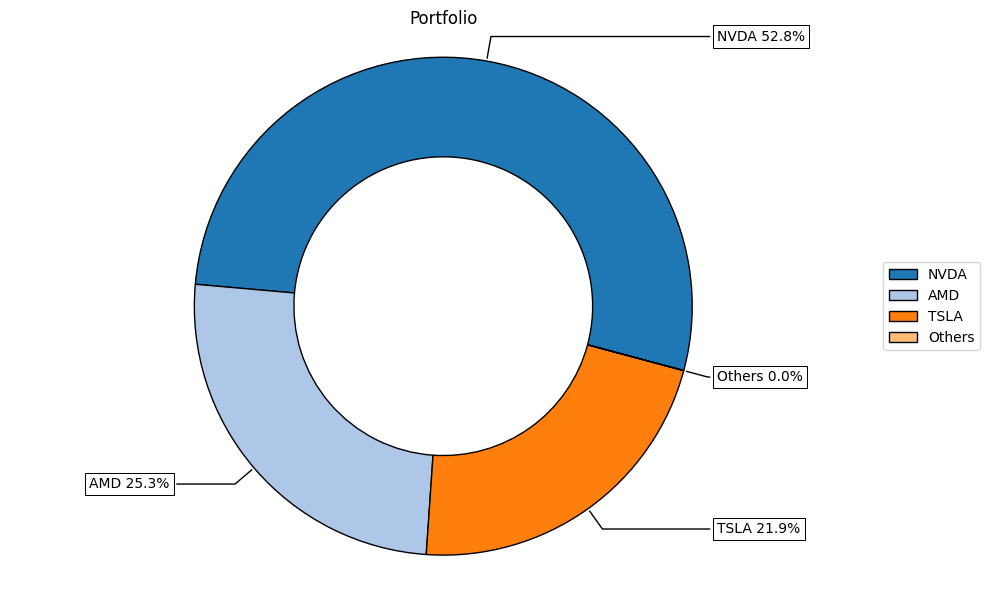

In [119]:
# Estimate the portfolio allocation that maximizes the risk adjusted return ratio (Sharpe)
ax = rp.plot_pie(w=w1,
                 title='Portfolio',
                 height=6,
                 width=10,
                 cmap="tab20",
                 ax=None)

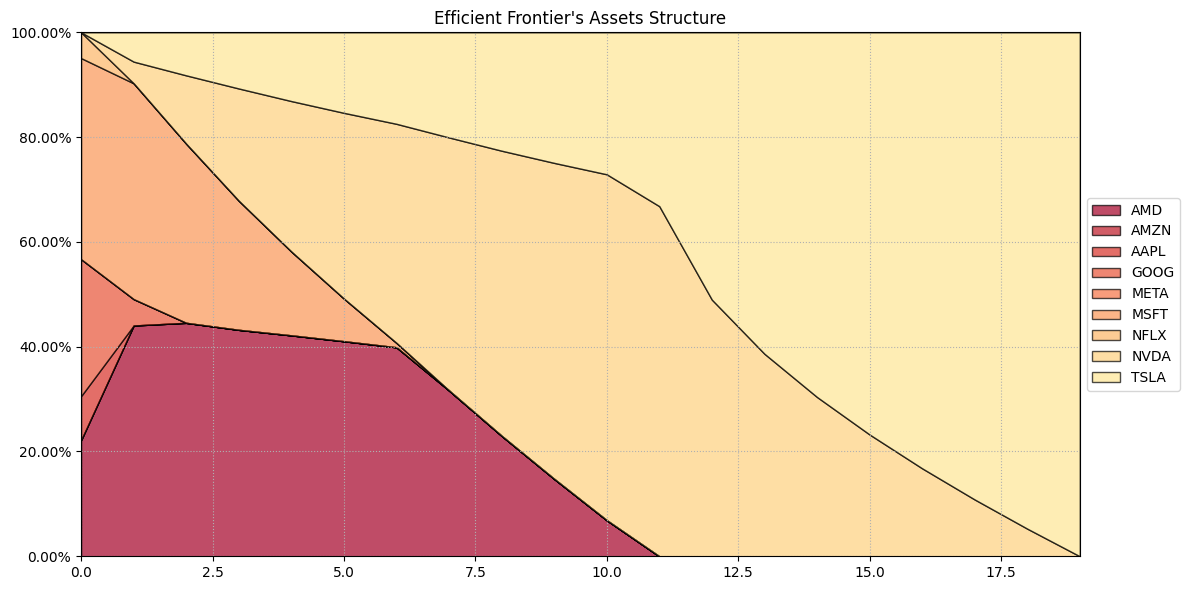

In [120]:
ax = rp.plot_frontier_area(w_frontier=ws, cmap="RdYlGn", height=6, width=12, ax=None)

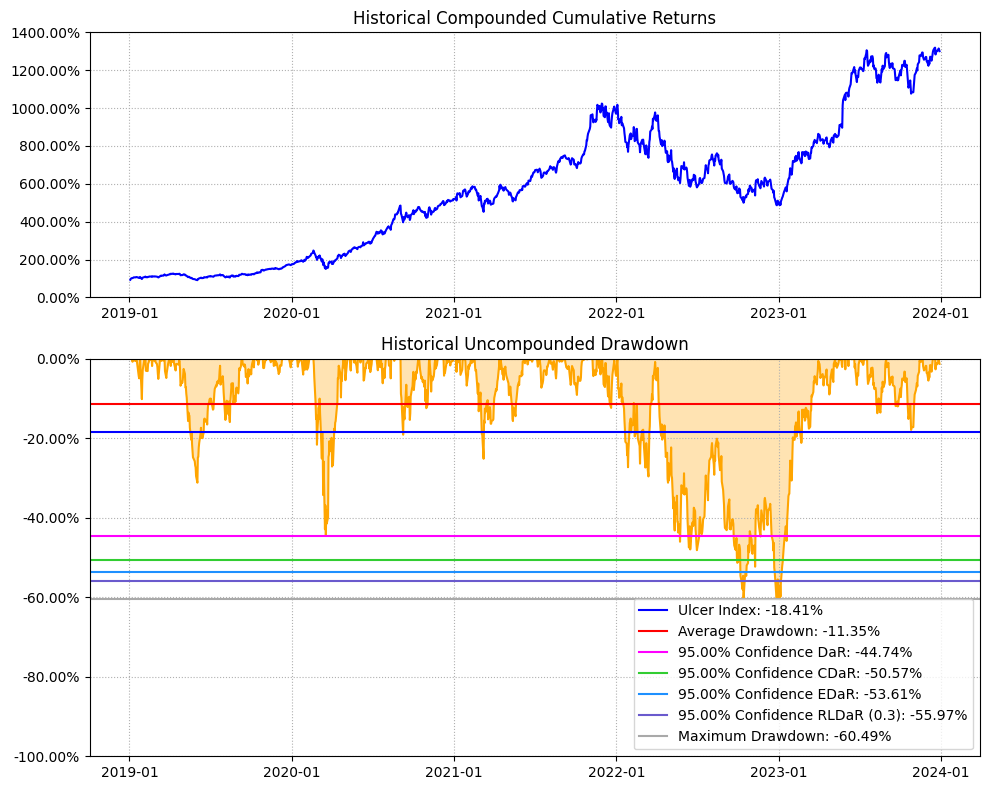

In [121]:
# Create a chart with the evolution of portfolio prices and drawdown.
ax = rp.plot_drawdown(returns=Y,
                      w=w1,
                      alpha=0.05,
                      height=8,
                      width=10,
                      ax=None)
# Showing tremendous returns over 4 years, but also maximum drawdowns up to -60%

In [122]:
#rm:Risk measure, portfolio weight that maximize the conditional value at risk


alpha=0.05
w_rp= port.optimization(model='Classic', rm='CVaR', obj='Sharpe', rf=0.0, l=0, hist=True)
display(w_rp)
# In summary, the allocation aims to find the combination of asset weights that maximizes the risk-adjusted return (Sharpe ratio) while considering the tail risk measured by CVaR at a 5% confidence level. 
# The optimization is performed within the Classic model, and the resulting weights indicate the suggested allocation to each asset in the portfolio.

,weights
AMD,6.3095%
AMZN,0.0000%
AAPL,0.0000%
GOOG,0.0000%
META,0.0000%
MSFT,0.0000%
NFLX,0.0000%
NVDA,75.2584%
TSLA,18.4320%


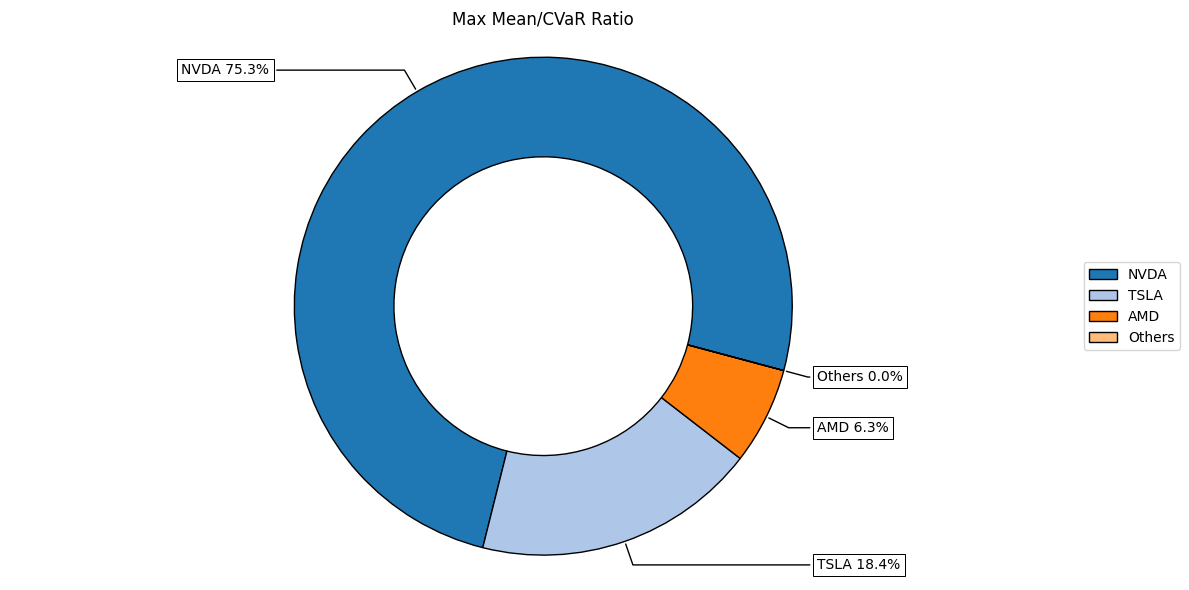

In [123]:
ax=rp.plot_pie(w=w_rp, title='Max Mean/CVaR Ratio', others= 0.05, nrow=25, cmap="tab20", height=6, width=12, ax=None)

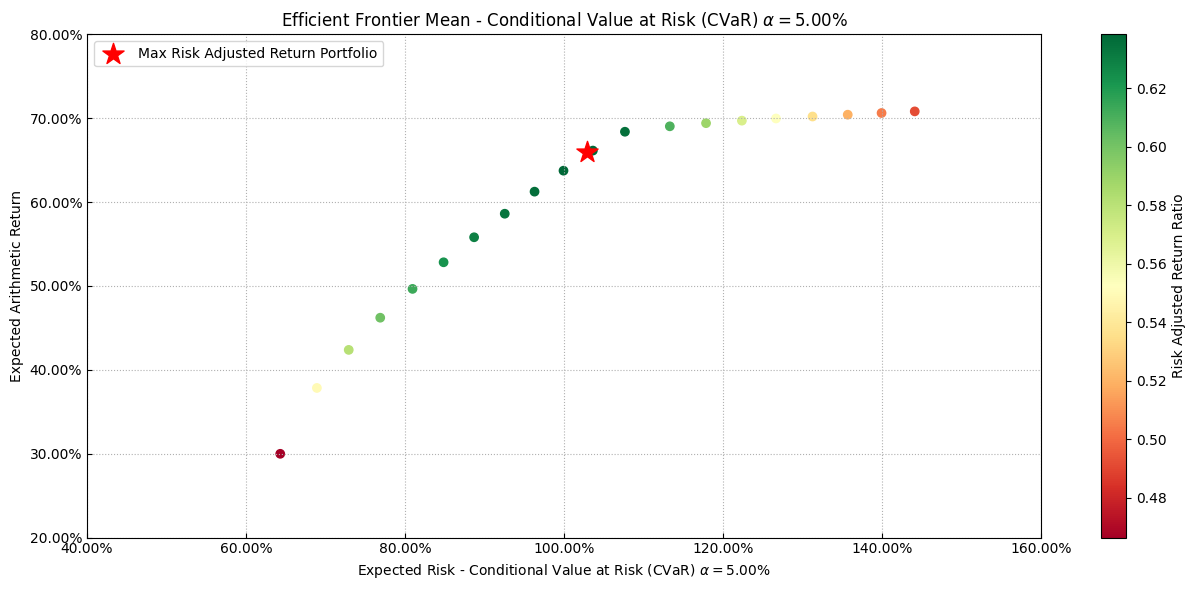

In [124]:
# This method calculates the worst case mean variance portfolio according to the objective function and uncertainty sets selected by the user.
label='Max Risk Adjusted Return Portfolio'
ax=rp.plot_frontier(w_frontier=ws, mu=mu, cov=cov, returns=returns, rm='CVaR', rf=0.0, alpha=alpha, cmap='RdYlGn', w=w_rp, label=label, marker='*', s=16, c='r', height=6, width=13, ax=None)